In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Cholesky Decomposition

### Introduction

There are many ways to factorize special types of matrices that we encounter often in machine learning. In the positive real numbers, we have the square-root operation that gives us a decomposition of the number into identical components, e.g., $9 = 3 \cdot 3$. 

For matrices, we need to be careful that we compute a square-root-like operation on positive quantities. For symmetric, positive definite matrices (see Section 3.2.3), we can choose from a number of square-root equivalent operations. The Cholesky decomposition/Cholesky factorization provides a square-root equivalent operation on symmetric, positive definite matrices that is useful in practice.

## Theorem 4.18 (Cholesky Decomposition)

**A symmetric, positive definite matrix $A$ can be factorized into a product $A = LL^T$, where $L$ is a lower-triangular matrix with positive diagonal elements:**

$$\begin{pmatrix}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \cdots & a_{nn}
\end{pmatrix} = 
\begin{pmatrix}
l_{11} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
l_{n1} & \cdots & l_{nn}
\end{pmatrix}
\begin{pmatrix}
l_{11} & \cdots & l_{n1} \\
\vdots & \ddots & \vdots \\
0 & \cdots & l_{nn}
\end{pmatrix}$$

$L$ is called the **Cholesky factor** of $A$, and $L$ is unique.

## Example  (Cholesky Factorization)

Consider a symmetric, positive definite matrix $A \in \mathbb{R}^{3 \times 3}$. We are interested in finding its Cholesky factorization $A = LL^T$, i.e.,

$$A = \begin{pmatrix}
a_{11} & a_{21} & a_{31} \\
a_{21} & a_{22} & a_{32} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix} = LL^T = 
\begin{pmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{pmatrix}
\begin{pmatrix}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{pmatrix}$$

Multiplying out the right-hand side yields:

$$A = \begin{pmatrix}
l_{11}^2 & l_{21}l_{11} & l_{31}l_{11} \\
l_{21}l_{11} & l_{21}^2 + l_{22}^2 & l_{31}l_{21} + l_{32}l_{22} \\
l_{31}l_{11} & l_{31}l_{21} + l_{32}l_{22} & l_{31}^2 + l_{32}^2 + l_{33}^2
\end{pmatrix}$$

## Algorithm for Computing Cholesky Decomposition

From the matrix equation above, we can derive the following algorithm by equating corresponding elements:

### Step-by-step computation:

1. **First column of $L$:**
   - $l_{11} = \sqrt{a_{11}}$
   - $l_{21} = \frac{a_{21}}{l_{11}}$
   - $l_{31} = \frac{a_{31}}{l_{11}}$

2. **Second column of $L$:**
   - $l_{22} = \sqrt{a_{22} - l_{21}^2}$
   - $l_{32} = \frac{a_{32} - l_{31}l_{21}}{l_{22}}$

3. **Third column of $L$:**
   - $l_{33} = \sqrt{a_{33} - l_{31}^2 - l_{32}^2}$

## General Algorithm

For a general $n \times n$ matrix, the Cholesky decomposition can be computed using:

$$l_{ij} = \begin{cases}
\sqrt{a_{ii} - \sum_{k=1}^{i-1} l_{ik}^2} & \text{if } i = j \\
\frac{1}{l_{jj}}\left(a_{ij} - \sum_{k=1}^{j-1} l_{ik}l_{jk}\right) & \text{if } i > j \\
0 & \text{if } i < j
\end{cases}$$

## Python Implementation

```python
import numpy as np

def cholesky_decomposition(A):
    """
    Compute the Cholesky decomposition of a symmetric positive definite matrix A.
    Returns lower triangular matrix L such that A = L @ L.T
    """
    n = A.shape[0]
    L = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1):
            if i == j:  # Diagonal elements
                L[i][j] = np.sqrt(A[i][i] - sum(L[i][k]**2 for k in range(j)))
            else:  # Below diagonal elements
                L[i][j] = (A[i][j] - sum(L[i][k] * L[j][k] for k in range(j))) / L[j][j]
    
    return L

# Example usage
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

L = cholesky_decomposition(A)
print("Original matrix A:")
print(A)
print("\nCholesky factor L:")
print(L)
print("\nVerification L @ L.T:")
print(L @ L.T)
print("\nDifference (should be close to zero):")
print(A - L @ L.T)
```

## Applications of Cholesky Decomposition

1. **Solving Linear Systems**: If $Ax = b$ where $A$ is symmetric positive definite, we can solve:
   - $Ly = b$ (forward substitution)
   - $L^Tx = y$ (backward substitution)

2. **Computing Matrix Determinant**: $\det(A) = (\prod_{i=1}^n l_{ii})^2$

3. **Matrix Inversion**: Efficient computation of $A^{-1}$

4. **Sampling from Multivariate Gaussian**: Generate $z \sim N(0, I)$, then $x = \mu + Lz \sim N(\mu, A)$

5. **Numerical Stability**: More stable than LU decomposition for symmetric positive definite matrices

## Computational Complexity

The Cholesky decomposition has computational complexity of $O(\frac{n^3}{3})$, which is about half the cost of LU decomposition ($O(\frac{2n^3}{3})$) for general matrices.

## Key Properties

- **Uniqueness**: The Cholesky factor $L$ is unique when diagonal elements are positive
- **Existence**: Exists if and only if the matrix is symmetric positive definite
- **Numerical Stability**: More numerically stable than other factorizations for SPD matrices
- **Memory Efficiency**: Only needs to store the lower triangular part

# 4.3 Cholesky Decomposition

## Introduction

There are many ways to factorize special types of matrices that we encounter often in machine learning. In the positive real numbers, we have the square-root operation that gives us a decomposition of the number into identical components, e.g., $9 = 3 \cdot 3$. 

For matrices, we need to be careful that we compute a square-root-like operation on positive quantities. For symmetric, positive definite matrices (see Section 3.2.3), we can choose from a number of square-root equivalent operations. The Cholesky decomposition/Cholesky factorization provides a square-root equivalent operation on symmetric, positive definite matrices that is useful in practice.

## Theorem 4.18 (Cholesky Decomposition)

**A symmetric, positive definite matrix $A$ can be factorized into a product $A = LL^T$, where $L$ is a lower-triangular matrix with positive diagonal elements:**

$$\begin{pmatrix}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \cdots & a_{nn}
\end{pmatrix} = 
\begin{pmatrix}
l_{11} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
l_{n1} & \cdots & l_{nn}
\end{pmatrix}
\begin{pmatrix}
l_{11} & \cdots & l_{n1} \\
\vdots & \ddots & \vdots \\
0 & \cdots & l_{nn}
\end{pmatrix}$$

$L$ is called the **Cholesky factor** of $A$, and $L$ is unique.

## Example 4.10 (Cholesky Factorization)

Consider a symmetric, positive definite matrix $A \in \mathbb{R}^{3 \times 3}$. We are interested in finding its Cholesky factorization $A = LL^T$, i.e.,

$$A = \begin{pmatrix}
a_{11} & a_{21} & a_{31} \\
a_{21} & a_{22} & a_{32} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix} = LL^T = 
\begin{pmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{pmatrix}
\begin{pmatrix}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{pmatrix}$$

Multiplying out the right-hand side yields:

$$A = \begin{pmatrix}
l_{11}^2 & l_{21}l_{11} & l_{31}l_{11} \\
l_{21}l_{11} & l_{21}^2 + l_{22}^2 & l_{31}l_{21} + l_{32}l_{22} \\
l_{31}l_{11} & l_{31}l_{21} + l_{32}l_{22} & l_{31}^2 + l_{32}^2 + l_{33}^2
\end{pmatrix}$$

## Algorithm for Computing Cholesky Decomposition

From the matrix equation above, we can derive the following algorithm by equating corresponding elements:

### Step-by-step computation:

1. **First column of $L$:**
   - $l_{11} = \sqrt{a_{11}}$
   - $l_{21} = \frac{a_{21}}{l_{11}}$
   - $l_{31} = \frac{a_{31}}{l_{11}}$

2. **Second column of $L$:**
   - $l_{22} = \sqrt{a_{22} - l_{21}^2}$
   - $l_{32} = \frac{a_{32} - l_{31}l_{21}}{l_{22}}$

3. **Third column of $L$:**
   - $l_{33} = \sqrt{a_{33} - l_{31}^2 - l_{32}^2}$

## General Algorithm

For a general $n \times n$ matrix, the Cholesky decomposition can be computed using:

$$l_{ij} = \begin{cases}
\sqrt{a_{ii} - \sum_{k=1}^{i-1} l_{ik}^2} & \text{if } i = j \\
\frac{1}{l_{jj}}\left(a_{ij} - \sum_{k=1}^{j-1} l_{ik}l_{jk}\right) & \text{if } i > j \\
0 & \text{if } i < j
\end{cases}$$

## Python Implementation

```python
import numpy as np

def cholesky_decomposition(A):
    """
    Compute the Cholesky decomposition of a symmetric positive definite matrix A.
    Returns lower triangular matrix L such that A = L @ L.T
    """
    n = A.shape[0]
    L = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1):
            if i == j:  # Diagonal elements
                L[i][j] = np.sqrt(A[i][i] - sum(L[i][k]**2 for k in range(j)))
            else:  # Below diagonal elements
                L[i][j] = (A[i][j] - sum(L[i][k] * L[j][k] for k in range(j))) / L[j][j]
    
    return L

# Example usage
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

L = cholesky_decomposition(A)
print("Original matrix A:")
print(A)
print("\nCholesky factor L:")
print(L)
print("\nVerification L @ L.T:")
print(L @ L.T)
print("\nDifference (should be close to zero):")
print(A - L @ L.T)
```

## Applications of Cholesky Decomposition

1. **Solving Linear Systems**: If $Ax = b$ where $A$ is symmetric positive definite, we can solve:
   - $Ly = b$ (forward substitution)
   - $L^Tx = y$ (backward substitution)

2. **Computing Matrix Determinant**: $\det(A) = (\prod_{i=1}^n l_{ii})^2$

3. **Matrix Inversion**: Efficient computation of $A^{-1}$

4. **Sampling from Multivariate Gaussian**: Generate $z \sim N(0, I)$, then $x = \mu + Lz \sim N(\mu, A)$

5. **Numerical Stability**: More stable than LU decomposition for symmetric positive definite matrices

## Computational Complexity

The Cholesky decomposition has computational complexity of $O(\frac{n^3}{3})$, which is about half the cost of LU decomposition ($O(\frac{2n^3}{3})$) for general matrices.

## Pattern Recognition in Cholesky Decomposition

Comparing the left-hand side of equation (4.45) and the right-hand side of equation (4.46) shows that there is a simple pattern in the diagonal elements $l_{ii}$:

$l_{11} = \sqrt{a_{11}}, \quad l_{22} = \sqrt{a_{22} - l_{21}^2}, \quad l_{33} = \sqrt{a_{33} - (l_{31}^2 + l_{32}^2)}$

Similarly for the elements below the diagonal ($l_{ij}$, where $i > j$), there is also a repeating pattern:

$l_{21} = \frac{a_{21}}{l_{11}}, \quad l_{31} = \frac{a_{31}}{l_{11}}, \quad l_{32} = \frac{1}{l_{22}}(a_{32} - l_{31}l_{21})$

Thus, we constructed the Cholesky decomposition for any symmetric, positive definite $3 \times 3$ matrix. The key realization is that we can backward calculate what the components $l_{ij}$ for the $L$ should be, given the values $a_{ij}$ for $A$ and previously computed values of $l_{ij}$.

## Importance in Machine Learning

The Cholesky decomposition is an important tool for the numerical computations underlying machine learning. Here, symmetric positive definite matrices require frequent manipulation, e.g., the covariance matrix of a multivariate Gaussian variable (see Section 6.5) is symmetric, positive definite. 

### Key Applications:

1. **Gaussian Sampling**: The Cholesky factorization of the covariance matrix allows us to generate samples from a Gaussian distribution.

2. **Variational Auto-encoders**: It allows us to perform a linear transformation of random variables, which is heavily exploited when computing gradients in deep stochastic models, such as the variational auto-encoder (Jimenez Rezende et al., 2014; Kingma and Welling, 2014).

3. **Efficient Determinant Computation**: The Cholesky decomposition also allows us to compute determinants very efficiently. Given the Cholesky decomposition $A = LL^T$, we know that:
   $\det(A) = \det(L)\det(L^T) = \det(L)^2$
   
   Since $L$ is a triangular matrix, the determinant is simply the product of its diagonal entries so that:
   $\det(A) = \left(\prod_i l_{ii}\right)^2$

Thus, many numerical software packages use the Cholesky decomposition to make computations more efficient.

## 4.4 Eigendecomposition and Diagonalization

A **diagonal matrix** is a matrix that has value zero on all off-diagonal elements, i.e., they are of the form:

$D = \begin{pmatrix}
c_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & c_n
\end{pmatrix}$

### Advantages of Diagonal Matrices

Diagonal matrices allow fast computation of:

1. **Determinants**: The determinant is the product of its diagonal entries
   $\det(D) = \prod_{i=1}^n c_i$

2. **Matrix Powers**: A matrix power $D^k$ is given by each diagonal element raised to the power $k$
   $D^k = \begin{pmatrix}
   c_1^k & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & c_n^k
   \end{pmatrix}$

3. **Matrix Inverse**: The inverse $D^{-1}$ is the reciprocal of its diagonal elements if all of them are nonzero
   $D^{-1} = \begin{pmatrix}
   c_1^{-1} & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & c_n^{-1}
   \end{pmatrix}$

In this section, we will discuss how to transform matrices into diagonal form through eigendecomposition.

## Key Properties

- **Uniqueness**: The Cholesky factor $L$ is unique when diagonal elements are positive
- **Existence**: Exists if and only if the matrix is symmetric positive definite
- **Numerical Stability**: More numerically stable than other factorizations for SPD matrices
- **Memory Efficiency**: Only needs to store the lower triangular part

In [1]:
import math

class Matrix:
    """A simple matrix class for core Python implementation"""
    
    def __init__(self, data):
        """Initialize matrix from 2D list"""
        if isinstance(data, list) and all(isinstance(row, list) for row in data):
            self.data = [row[:] for row in data]  # Deep copy
            self.rows = len(data)
            self.cols = len(data[0]) if data else 0
        else:
            raise ValueError("Data must be a 2D list")
    
    def __getitem__(self, key):
        """Get matrix element: matrix[i, j] or matrix[i][j]"""
        if isinstance(key, tuple):
            i, j = key
            return self.data[i][j]
        else:
            return self.data[key]
    
    def __setitem__(self, key, value):
        """Set matrix element: matrix[i, j] = value"""
        if isinstance(key, tuple):
            i, j = key
            self.data[i][j] = value
        else:
            self.data[key] = value
    
    def __str__(self):
        """String representation of matrix"""
        max_width = max(len(f"{self.data[i][j]:.6f}") for i in range(self.rows) for j in range(self.cols))
        result = []
        for i in range(self.rows):
            row_str = " ".join(f"{self.data[i][j]:>{max_width}.6f}" for j in range(self.cols))
            result.append(f"[{row_str}]")
        return "\n".join(result)
    
    def transpose(self):
        """Return transpose of matrix"""
        transposed_data = [[self.data[j][i] for j in range(self.rows)] for i in range(self.cols)]
        return Matrix(transposed_data)
    
    def multiply(self, other):
        """Matrix multiplication"""
        if self.cols != other.rows:
            raise ValueError("Matrix dimensions incompatible for multiplication")
        
        result_data = [[0 for _ in range(other.cols)] for _ in range(self.rows)]
        for i in range(self.rows):
            for j in range(other.cols):
                for k in range(self.cols):
                    result_data[i][j] += self.data[i][k] * other.data[k][j]
        
        return Matrix(result_data)
    
    def subtract(self, other):
        """Matrix subtraction"""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrix dimensions must match for subtraction")
        
        result_data = [[self.data[i][j] - other.data[i][j] for j in range(self.cols)] for i in range(self.rows)]
        return Matrix(result_data)
    
    def is_symmetric(self, tolerance=1e-10):
        """Check if matrix is symmetric"""
        if self.rows != self.cols:
            return False
        
        for i in range(self.rows):
            for j in range(self.cols):
                if abs(self.data[i][j] - self.data[j][i]) > tolerance:
                    return False
        return True
    
    def is_positive_definite(self):
        """Check if matrix is positive definite using Sylvester's criterion"""
        if not self.is_symmetric():
            return False
        
        # Check all leading principal minors are positive
        for k in range(1, self.rows + 1):
            # Extract k×k leading principal submatrix
            submatrix = Matrix([[self.data[i][j] for j in range(k)] for i in range(k)])
            det = submatrix.determinant()
            if det <= 0:
                return False
        return True
    
    def determinant(self):
        """Calculate determinant using LU decomposition"""
        if self.rows != self.cols:
            raise ValueError("Determinant only defined for square matrices")
        
        n = self.rows
        # Create a copy for LU decomposition
        temp_data = [row[:] for row in self.data]
        
        det = 1.0
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(temp_data[k][i]) > abs(temp_data[max_row][i]):
                    max_row = k
            
            # Swap rows if needed
            if max_row != i:
                temp_data[i], temp_data[max_row] = temp_data[max_row], temp_data[i]
                det *= -1  # Row swap changes sign of determinant
            
            # Check for zero pivot
            if abs(temp_data[i][i]) < 1e-10:
                return 0.0
            
            det *= temp_data[i][i]
            
            # Eliminate column
            for k in range(i + 1, n):
                factor = temp_data[k][i] / temp_data[i][i]
                for j in range(i, n):
                    temp_data[k][j] -= factor * temp_data[i][j]
        
        return det


def cholesky_decomposition(matrix):
    """
    Compute Cholesky decomposition of a symmetric positive definite matrix.
    Returns lower triangular matrix L such that A = L * L^T
    """
    if not isinstance(matrix, Matrix):
        raise TypeError("Input must be a Matrix object")
    
    if matrix.rows != matrix.cols:
        raise ValueError("Matrix must be square")
    
    if not matrix.is_symmetric():
        raise ValueError("Matrix must be symmetric")
    
    if not matrix.is_positive_definite():
        raise ValueError("Matrix must be positive definite")
    
    n = matrix.rows
    # Initialize L as zero matrix
    L_data = [[0.0 for _ in range(n)] for _ in range(n)]
    
    # Compute Cholesky decomposition
    for i in range(n):
        for j in range(i + 1):
            if i == j:  # Diagonal elements
                # l_ii = sqrt(a_ii - sum(l_ik^2 for k < i))
                sum_squares = sum(L_data[i][k] ** 2 for k in range(j))
                L_data[i][j] = math.sqrt(matrix[i, i] - sum_squares)
            else:  # Below diagonal elements
                # l_ij = (a_ij - sum(l_ik * l_jk for k < j)) / l_jj
                sum_products = sum(L_data[i][k] * L_data[j][k] for k in range(j))
                L_data[i][j] = (matrix[i, j] - sum_products) / L_data[j][j]
    
    return Matrix(L_data)


def solve_linear_system_cholesky(A, b):
    """
    Solve linear system Ax = b using Cholesky decomposition
    where A is symmetric positive definite
    """
    if not isinstance(A, Matrix) or not isinstance(b, list):
        raise TypeError("A must be Matrix, b must be list")
    
    n = A.rows
    if len(b) != n:
        raise ValueError("Dimension mismatch between A and b")
    
    # Get Cholesky decomposition
    L = cholesky_decomposition(A)
    
    # Forward substitution: Ly = b
    y = [0.0] * n
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]
        y[i] /= L[i, i]
    
    # Backward substitution: L^T x = y
    x = [0.0] * n
    L_T = L.transpose()
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= L_T[i, j] * x[j]
        x[i] /= L_T[i, i]
    
    return x


def matrix_determinant_cholesky(matrix):
    """
    Compute determinant using Cholesky decomposition
    det(A) = (product of diagonal elements of L)^2
    """
    L = cholesky_decomposition(matrix)
    diagonal_product = 1.0
    for i in range(L.rows):
        diagonal_product *= L[i, i]
    return diagonal_product ** 2


def generate_gaussian_sample(mean, covariance, random_generator=None):
    """
    Generate sample from multivariate Gaussian distribution
    using Cholesky decomposition
    """
    import random
    if random_generator is None:
        random_generator = random
    
    if not isinstance(mean, list):
        raise TypeError("Mean must be a list")
    
    n = len(mean)
    L = cholesky_decomposition(covariance)
    
    # Generate standard normal random variables
    z = [random_generator.gauss(0, 1) for _ in range(n)]
    
    # Transform: x = mean + L * z
    x = mean[:]
    for i in range(n):
        for j in range(i + 1):
            x[i] += L[i, j] * z[j]
    
    return x


# Example usage and testing
if __name__ == "__main__":
    print("=== Cholesky Decomposition - Pure Python Implementation ===\n")
    
    # Example 1: 3x3 symmetric positive definite matrix
    print("Example 1: 3x3 Matrix")
    A_data = [
        [4, 2, 1],
        [2, 3, 0.5],
        [1, 0.5, 2]
    ]
    A = Matrix(A_data)
    
    print("Original matrix A:")
    print(A)
    print(f"\nIs symmetric: {A.is_symmetric()}")
    print(f"Is positive definite: {A.is_positive_definite()}")
    
    # Compute Cholesky decomposition
    L = cholesky_decomposition(A)
    print("\nCholesky factor L:")
    print(L)
    
    # Verify: L * L^T should equal A
    L_T = L.transpose()
    A_reconstructed = L.multiply(L_T)
    print("\nVerification L * L^T:")
    print(A_reconstructed)
    
    # Check difference
    diff = A.subtract(A_reconstructed)
    print("\nDifference A - L*L^T (should be close to zero):")
    print(diff)
    
    # Example 2: Solve linear system
    print("\n" + "="*50)
    print("Example 2: Solving Linear System Ax = b")
    b = [1, 2, 3]
    x = solve_linear_system_cholesky(A, b)
    print(f"Solution x: {[f'{val:.6f}' for val in x]}")
    
    # Verify solution
    A_times_x = [sum(A[i, j] * x[j] for j in range(len(x))) for i in range(A.rows)]
    print(f"Verification Ax: {[f'{val:.6f}' for val in A_times_x]}")
    print(f"Original b:     {[f'{val:.6f}' for val in b]}")
    
    # Example 3: Determinant computation
    print("\n" + "="*50)
    print("Example 3: Determinant Computation")
    det_cholesky = matrix_determinant_cholesky(A)
    det_direct = A.determinant()
    print(f"Determinant (Cholesky): {det_cholesky:.6f}")
    print(f"Determinant (Direct):   {det_direct:.6f}")
    
    # Example 4: Gaussian sampling
    print("\n" + "="*50)
    print("Example 4: Multivariate Gaussian Sampling")
    mean = [0, 0, 0]
    covariance = A  # Use A as covariance matrix
    
    print("Generating 5 samples from multivariate Gaussian:")
    import random
    random.seed(42)  # For reproducible results
    
    for i in range(5):
        sample = generate_gaussian_sample(mean, covariance)
        print(f"Sample {i+1}: [{', '.join(f'{val:8.4f}' for val in sample)}]")
    
    # Example 5: Pattern demonstration
    print("\n" + "="*50)
    print("Example 5: Cholesky Pattern Demonstration")
    print("For the 3x3 case, showing the computational pattern:")
    
    a11, a21, a31 = A[0,0], A[1,0], A[2,0]
    a22, a32 = A[1,1], A[2,1]
    a33 = A[2,2]
    
    # Diagonal elements pattern
    l11 = math.sqrt(a11)
    l21 = a21 / l11
    l22 = math.sqrt(a22 - l21**2)
    l31 = a31 / l11
    l32 = (a32 - l31 * l21) / l22
    l33 = math.sqrt(a33 - (l31**2 + l32**2))
    
    print(f"l11 = sqrt({a11}) = {l11:.6f}")
    print(f"l21 = {a21} / {l11:.6f} = {l21:.6f}")
    print(f"l22 = sqrt({a22} - {l21:.6f}²) = {l22:.6f}")
    print(f"l31 = {a31} / {l11:.6f} = {l31:.6f}")
    print(f"l32 = ({a32} - {l31:.6f} * {l21:.6f}) / {l22:.6f} = {l32:.6f}")
    print(f"l33 = sqrt({a33} - ({l31:.6f}² + {l32:.6f}²)) = {l33:.6f}")
    
    print("\nCompare with computed L matrix:")
    print(f"L[0,0] = {L[0,0]:.6f}, L[1,0] = {L[1,0]:.6f}, L[2,0] = {L[2,0]:.6f}")
    print(f"L[1,1] = {L[1,1]:.6f}, L[2,1] = {L[2,1]:.6f}, L[2,2] = {L[2,2]:.6f}")

=== Cholesky Decomposition - Pure Python Implementation ===

Example 1: 3x3 Matrix
Original matrix A:
[4.000000 2.000000 1.000000]
[2.000000 3.000000 0.500000]
[1.000000 0.500000 2.000000]

Is symmetric: True
Is positive definite: True

Cholesky factor L:
[2.000000 0.000000 0.000000]
[1.000000 1.414214 0.000000]
[0.500000 0.000000 1.322876]

Verification L * L^T:
[4.000000 2.000000 1.000000]
[2.000000 3.000000 0.500000]
[1.000000 0.500000 2.000000]

Difference A - L*L^T (should be close to zero):
[ 0.000000  0.000000  0.000000]
[ 0.000000 -0.000000  0.000000]
[ 0.000000  0.000000  0.000000]

Example 2: Solving Linear System Ax = b
Solution x: ['-0.517857', '0.750000', '1.571429']
Verification Ax: ['1.000000', '2.000000', '3.000000']
Original b:     ['1.000000', '2.000000', '3.000000']

Example 3: Determinant Computation
Determinant (Cholesky): 14.000000
Determinant (Direct):   14.000000

Example 4: Multivariate Gaussian Sampling
Generating 5 samples from multivariate Gaussian:
Sample 1

where $P \in \mathbb{R}^{n \times n}$ and $D$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$, if and only if the eigenvectors of $A$ form a basis of $\mathbb{R}^n$.

## Python Implementation of Eigendecomposition
# Example usage
print("=== Eigendecomposition Examples ===\n")

# Example 1: 2x2 symmetric matrix
A = np.array([[3, 1],
              [1, 3]])

eigenvalues, P = eigendecomposition_2x2(A)
D = np.diag(eigenvalues)

print("Example 1: 2x2 Symmetric Matrix")
print("Original matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print("Eigenvector matrix P:")
print(P)
print("Diagonal matrix D:")
print(D)

# Verify A = PDP^(-1)
A_reconstructed = P @ # 4.3 Cholesky Decomposition

## Introduction

There are many ways to factorize special types of matrices that we encounter often in machine learning. In the positive real numbers, we have the square-root operation that gives us a decomposition of the number into identical components, e.g., $9 = 3 \cdot 3$. 

For matrices, we need to be careful that we compute a square-root-like operation on positive quantities. For symmetric, positive definite matrices (see Section 3.2.3), we can choose from a number of square-root equivalent operations. The Cholesky decomposition/Cholesky factorization provides a square-root equivalent operation on symmetric, positive definite matrices that is useful in practice.

## Theorem 4.18 (Cholesky Decomposition)

**A symmetric, positive definite matrix $A$ can be factorized into a product $A = LL^T$, where $L$ is a lower-triangular matrix with positive diagonal elements:**

$$\begin{pmatrix}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \cdots & a_{nn}
\end{pmatrix} = 
\begin{pmatrix}
l_{11} & \cdots & 0 \\
\vdots & \ddots & \vdots \\
l_{n1} & \cdots & l_{nn}
\end{pmatrix}
\begin{pmatrix}
l_{11} & \cdots & l_{n1} \\
\vdots & \ddots & \vdots \\
0 & \cdots & l_{nn}
\end{pmatrix}$$

$L$ is called the **Cholesky factor** of $A$, and $L$ is unique.

## Example 4.10 (Cholesky Factorization)

Consider a symmetric, positive definite matrix $A \in \mathbb{R}^{3 \times 3}$. We are interested in finding its Cholesky factorization $A = LL^T$, i.e.,

$$A = \begin{pmatrix}
a_{11} & a_{21} & a_{31} \\
a_{21} & a_{22} & a_{32} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix} = LL^T = 
\begin{pmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{pmatrix}
\begin{pmatrix}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{pmatrix}$$

Multiplying out the right-hand side yields:

$$A = \begin{pmatrix}
l_{11}^2 & l_{21}l_{11} & l_{31}l_{11} \\
l_{21}l_{11} & l_{21}^2 + l_{22}^2 & l_{31}l_{21} + l_{32}l_{22} \\
l_{31}l_{11} & l_{31}l_{21} + l_{32}l_{22} & l_{31}^2 + l_{32}^2 + l_{33}^2
\end{pmatrix}$$

## Algorithm for Computing Cholesky Decomposition

From the matrix equation above, we can derive the following algorithm by equating corresponding elements:

### Step-by-step computation:

1. **First column of $L$:**
   - $l_{11} = \sqrt{a_{11}}$
   - $l_{21} = \frac{a_{21}}{l_{11}}$
   - $l_{31} = \frac{a_{31}}{l_{11}}$

2. **Second column of $L$:**
   - $l_{22} = \sqrt{a_{22} - l_{21}^2}$
   - $l_{32} = \frac{a_{32} - l_{31}l_{21}}{l_{22}}$

3. **Third column of $L$:**
   - $l_{33} = \sqrt{a_{33} - l_{31}^2 - l_{32}^2}$

## General Algorithm

For a general $n \times n$ matrix, the Cholesky decomposition can be computed using:

$$l_{ij} = \begin{cases}
\sqrt{a_{ii} - \sum_{k=1}^{i-1} l_{ik}^2} & \text{if } i = j \\
\frac{1}{l_{jj}}\left(a_{ij} - \sum_{k=1}^{j-1} l_{ik}l_{jk}\right) & \text{if } i > j \\
0 & \text{if } i < j
\end{cases}$$

## Python Implementation

```python
import numpy as np

def cholesky_decomposition(A):
    """
    Compute the Cholesky decomposition of a symmetric positive definite matrix A.
    Returns lower triangular matrix L such that A = L @ L.T
    """
    n = A.shape[0]
    L = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1):
            if i == j:  # Diagonal elements
                L[i][j] = np.sqrt(A[i][i] - sum(L[i][k]**2 for k in range(j)))
            else:  # Below diagonal elements
                L[i][j] = (A[i][j] - sum(L[i][k] * L[j][k] for k in range(j))) / L[j][j]
    
    return L

# Example usage
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

L = cholesky_decomposition(A)
print("Original matrix A:")
print(A)
print("\nCholesky factor L:")
print(L)
print("\nVerification L @ L.T:")
print(L @ L.T)
print("\nDifference (should be close to zero):")
print(A - L @ L.T)
```

## Applications of Cholesky Decomposition

1. **Solving Linear Systems**: If $Ax = b$ where $A$ is symmetric positive definite, we can solve:
   - $Ly = b$ (forward substitution)
   - $L^Tx = y$ (backward substitution)

2. **Computing Matrix Determinant**: $\det(A) = (\prod_{i=1}^n l_{ii})^2$

3. **Matrix Inversion**: Efficient computation of $A^{-1}$

4. **Sampling from Multivariate Gaussian**: Generate $z \sim N(0, I)$, then $x = \mu + Lz \sim N(\mu, A)$

5. **Numerical Stability**: More stable than LU decomposition for symmetric positive definite matrices

## Computational Complexity

The Cholesky decomposition has computational complexity of $O(\frac{n^3}{3})$, which is about half the cost of LU decomposition ($O(\frac{2n^3}{3})$) for general matrices.

## Pattern Recognition in Cholesky Decomposition

Comparing the left-hand side of equation (4.45) and the right-hand side of equation (4.46) shows that there is a simple pattern in the diagonal elements $l_{ii}$:

$l_{11} = \sqrt{a_{11}}, \quad l_{22} = \sqrt{a_{22} - l_{21}^2}, \quad l_{33} = \sqrt{a_{33} - (l_{31}^2 + l_{32}^2)}$

Similarly for the elements below the diagonal ($l_{ij}$, where $i > j$), there is also a repeating pattern:

$l_{21} = \frac{a_{21}}{l_{11}}, \quad l_{31} = \frac{a_{31}}{l_{11}}, \quad l_{32} = \frac{1}{l_{22}}(a_{32} - l_{31}l_{21})$

Thus, we constructed the Cholesky decomposition for any symmetric, positive definite $3 \times 3$ matrix. The key realization is that we can backward calculate what the components $l_{ij}$ for the $L$ should be, given the values $a_{ij}$ for $A$ and previously computed values of $l_{ij}$.

## Importance in Machine Learning

The Cholesky decomposition is an important tool for the numerical computations underlying machine learning. Here, symmetric positive definite matrices require frequent manipulation, e.g., the covariance matrix of a multivariate Gaussian variable (see Section 6.5) is symmetric, positive definite. 

### Key Applications:

1. **Gaussian Sampling**: The Cholesky factorization of the covariance matrix allows us to generate samples from a Gaussian distribution.

2. **Variational Auto-encoders**: It allows us to perform a linear transformation of random variables, which is heavily exploited when computing gradients in deep stochastic models, such as the variational auto-encoder (Jimenez Rezende et al., 2014; Kingma and Welling, 2014).

3. **Efficient Determinant Computation**: The Cholesky decomposition also allows us to compute determinants very efficiently. Given the Cholesky decomposition $A = LL^T$, we know that:
   $\det(A) = \det(L)\det(L^T) = \det(L)^2$
   
   Since $L$ is a triangular matrix, the determinant is simply the product of its diagonal entries so that:
   $\det(A) = \left(\prod_i l_{ii}\right)^2$

Thus, many numerical software packages use the Cholesky decomposition to make computations more efficient.

## 4.4 Eigendecomposition and Diagonalization

A **diagonal matrix** is a matrix that has value zero on all off-diagonal elements, i.e., they are of the form:

$D = \begin{pmatrix}
c_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & c_n
\end{pmatrix}$

### Advantages of Diagonal Matrices

Diagonal matrices allow fast computation of:

1. **Determinants**: The determinant is the product of its diagonal entries
   $\det(D) = \prod_{i=1}^n c_i$

2. **Matrix Powers**: A matrix power $D^k$ is given by each diagonal element raised to the power $k$
   $D^k = \begin{pmatrix}
   c_1^k & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & c_n^k
   \end{pmatrix}$

3. **Matrix Inverse**: The inverse $D^{-1}$ is the reciprocal of its diagonal elements if all of them are nonzero
   $D^{-1} = \begin{pmatrix}
   c_1^{-1} & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & c_n^{-1}
   \end{pmatrix}$

In this section, we will discuss how to transform matrices into diagonal form through eigendecomposition.

This is an important application of the basis change we discussed in Section 2.7.2 and eigenvalues from Section 4.2. Recall that two matrices $A$, $D$ are similar (Definition 2.22) if there exists an invertible matrix $P$, such that $D = P^{-1}AP$. More specifically, we will look at matrices $A$ that are similar to diagonal matrices $D$ that contain the eigenvalues of $A$ on the diagonal.

### Definition 4.19 (Diagonalizable)
A matrix $A \in \mathbb{R}^{n \times n}$ is **diagonalizable** if it is similar to a diagonal matrix, i.e., if there exists an invertible matrix $P \in \mathbb{R}^{n \times n}$ such that $D = P^{-1}AP$.

In the following, we will see that diagonalizing a matrix $A \in \mathbb{R}^{n \times n}$ is a way of expressing the same linear mapping but in another basis (see Section 2.6.1), which will turn out to be a basis that consists of the eigenvectors of $A$.

### Eigendecomposition Derivation

Let $A \in \mathbb{R}^{n \times n}$, let $\lambda_1, \ldots, \lambda_n$ be a set of scalars, and let $\mathbf{p}_1, \ldots, \mathbf{p}_n$ be a set of vectors in $\mathbb{R}^n$. We define $P := [\mathbf{p}_1, \ldots, \mathbf{p}_n]$ and let $D \in \mathbb{R}^{n \times n}$ be a diagonal matrix with diagonal entries $\lambda_1, \ldots, \lambda_n$. Then we can show that:

$AP = PD \tag{4.50}$

if and only if $\lambda_1, \ldots, \lambda_n$ are the eigenvalues of $A$ and $\mathbf{p}_1, \ldots, \mathbf{p}_n$ are corresponding eigenvectors of $A$.

We can see that this statement holds because:

$AP = A[\mathbf{p}_1, \ldots, \mathbf{p}_n] = [A\mathbf{p}_1, \ldots, A\mathbf{p}_n] \tag{4.51}$

$PD = [\mathbf{p}_1, \ldots, \mathbf{p}_n] \begin{pmatrix}
\lambda_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \lambda_n
\end{pmatrix} = [\lambda_1\mathbf{p}_1, \ldots, \lambda_n\mathbf{p}_n] \tag{4.52}$

Thus, equation (4.50) implies that:
$A\mathbf{p}_1 = \lambda_1\mathbf{p}_1 \tag{4.53}$
$\vdots$
$A\mathbf{p}_n = \lambda_n\mathbf{p}_n \tag{4.54}$

Therefore, the columns of $P$ must be eigenvectors of $A$.

### Conditions for Diagonalization

Our definition of diagonalization requires that $P \in \mathbb{R}^{n \times n}$ is invertible, i.e., $P$ has full rank (Theorem 4.3). This requires us to have $n$ linearly independent eigenvectors $\mathbf{p}_1, \ldots, \mathbf{p}_n$, i.e., the $\mathbf{p}_i$ form a basis of $\mathbb{R}^n$.

### Theorem 4.20 (Eigendecomposition)
A square matrix $A \in \mathbb{R}^{n \times n}$ can be factored into:

$A = PDP^{-1} \tag{4.55}$

where $P \in \mathbb{R}^{n \times n}$ and $D$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$, if and only if the eigenvectors of $A$ form a basis of $\mathbb{R}^n$.

## Key Properties

- **Uniqueness**: The Cholesky factor $L$ is unique when diagonal elements are positive
- **Existence**: Exists if and only if the matrix is symmetric positive definite
- **Numerical Stability**: More numerically stable than other factorizations for SPD matrices
- **Memory Efficiency**: Only needs to store the lower triangular part

In [ ]:

import numpy as np

def power_iteration(A, num_iterations=1000, tolerance=1e-10):
    """
    Find the dominant eigenvalue and eigenvector using power iteration.
    """
    n = A.shape[0]
    # Start with random vector
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    
    for i in range(num_iterations):
        # Apply matrix
        Av = A @ v
        # Normalize
        v_new = Av / np.linalg.norm(Av)
        
        # Check convergence
        if np.linalg.norm(v_new - v) < tolerance:
            break
        v = v_new
    
    # Compute eigenvalue using Rayleigh quotient
    eigenvalue = (v.T @ A @ v) / (v.T @ v)
    return eigenvalue, v

def eigendecomposition_2x2(A):
    """
    Analytical eigendecomposition for 2x2 matrices.
    """
    if A.shape != (2, 2):
        raise ValueError("Matrix must be 2x2")
    
    a, b = A[0, 0], A[0, 1]
    c, d = A[1, 0], A[1, 1]
    
    # Characteristic polynomial: λ² - trace(A)λ + det(A) = 0
    trace = a + d
    det = a * d - b * c
    
    # Solve quadratic equation
    discriminant = trace**2 - 4*det
    if discriminant < 0:
        raise ValueError("Complex eigenvalues not supported")
    
    lambda1 = (trace + np.sqrt(discriminant)) / 2
    lambda2 = (trace - np.sqrt(discriminant)) / 2
    
    # Find eigenvectors
    def find_eigenvector(lam):
        # Solve (A - λI)v = 0
        M = A - lam * np.eye(2)
        if abs(M[0, 0]) > 1e-10:
            return np.array([1, -M[0, 0] / M[0, 1]]) if abs(M[0, 1]) > 1e-10 else np.array([1, 0])
        elif abs(M[1, 0]) > 1e-10:
            return np.array([-M[1, 1] / M[1, 0], 1]) if abs(M[1, 0]) > 1e-10 else np.array([0, 1])
        else:
            return np.array([1, 0])  # Any vector works if M is zero matrix
    
    v1 = find_eigenvector(lambda1)
    v2 = find_eigenvector(lambda2)
    
    # Normalize eigenvectors
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
    return np.array([lambda1, lambda2]), np.column_stack([v1, v2])



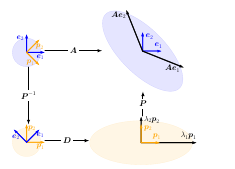

**Fig.7** Intuition behind the eigendecomposition as sequential transformations. Top-left to bottom-left: P −1 performs a basis change (here drawn in R2 and depicted as a rotation-like operation) from the standard basis into the eigenbasis. Bottom-left to bottom-right: D performs a scaling along the remapped orthogonal eigenvectors, depicted here by a circle being stretched to an ellipse. Bottom-right to top-right: P undoes the basis change (depicted as a reverse rotation) and restores the original coordinate frame.
Intuition behind the eigendecomposition as sequential transformations.

- *Top-left to bottom-left*: $ P^{-1} $ performs a basis change (here drawn in $ \mathbb{R}^2 $ and depicted as a rotation-like operation) from the standard basis into the eigenbasis.
- *Bottom-left to bottom-right*: $ D $ performs a scaling along the remapped orthogonal eigenvectors, depicted here by a circle being stretched to an ellipse.
- *Bottom-right to top-right*: $ P $ undoes the basis change (depicted as a reverse rotation) and restores the original coordinate frame.

**Theorem 4.20** implies that only non-defective matrices can be diagonalized and that the columns of $ P $ are the $ n $ eigenvectors of $ A $. For symmetric matrices, we can obtain even stronger outcomes for the eigenvalue decomposition.

**Theorem 4.21.** A symmetric matrix $ S \in \mathbb{R}^{n \times n} $ can always be diagonalized.

Theorem 4.21 follows directly from the spectral theorem 4.15. Moreover, the spectral theorem states that we can find an ONB of eigenvectors of $ \mathbb{R}^n $. This makes $ P $ an orthogonal matrix so that $ D = P^\top A P $.

**Remark.** The Jordan normal form of a matrix offers a decomposition that works for defective matrices (Lang, 1987) but is beyond the scope of this book. $ \diamond $

### Geometric Intuition for the Eigendecomposition

We can interpret the eigendecomposition of a matrix as follows (see also Figure 4.7): Let $ A $ be the transformation matrix of a linear mapping with respect to the standard basis $ e_i $ (blue arrows). $ P^{-1} $ performs a basis change from the standard basis into the eigenbasis. Then, the diagonal $ D $ scales the vectors along these axes by the eigenvalues $ \lambda_i $. Finally, $ P $ transforms these scaled vectors back into the standard/canonical coordinates yielding $ \lambda_i p_i $.

### Example 4.11 (Eigendecomposition)

Let us compute the eigendecomposition of

$$
A = \begin{bmatrix} \frac{5}{2} & -1 \\ -1 & \frac{5}{2} \end{bmatrix}.
$$

**Step 1: Compute eigenvalues and eigenvectors.** The characteristic polynomial of $ A $ is

$$
\det(A - \lambda I) = \det \begin{bmatrix} \frac{5}{2} - \lambda & -1 \\ -1 & \frac{5}{2} - \lambda \end{bmatrix} \tag{4.56a}
$$

$$
= \left( \frac{5}{2} - \lambda \right)^2 - 1 = \lambda^2 - 5\lambda + \frac{21}{4} = \left( \lambda - \frac{7}{2} \right) \left( \lambda - \frac{3}{2} \right). \tag{4.56b}
$$

Therefore, the eigenvalues of $ A $ are $ \lambda_1 = \frac{7}{2} $ and $ \lambda_2 = \frac{3}{2} $ (the roots of the characteristic polynomial), and the associated (normalized) eigenvectors are obtained via

$$
A p_1 = \frac{7}{2} p_1, \quad A p_2 = \frac{3}{2} p_2. \tag{4.57}
$$

This yields

$$
p_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad p_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}. \tag{4.58}
$$

**Step 2: Check for existence.** The eigenvectors $ p_1, p_2 $ form a basis of $ \mathbb{R}^2 $. Therefore, $ A $ can be diagonalized.

**Step 3: Construct the matrix $ P $ to diagonalize $ A $.** We collect the eigenvectors of $ A $ in $ P $ so that

$$
P = [p_1, p_2] = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}. \tag{4.59}
$$

We then obtain

$$
P^{-1} A P = \begin{bmatrix} \frac{7}{2} & 0 \\ 0 & \frac{3}{2} \end{bmatrix} = D. \tag{4.60}
$$

Equivalently, we get (exploiting that $ P^{-1} = P^\top $ since the eigenvectors $ p_1 $ and $ p_2 $ in this example form an ONB)

$$
\underbrace{\begin{bmatrix} \frac{5}{2} & -1 \\ -1 & \frac{5}{2} \end{bmatrix}}_{A}
= \underbrace{\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}}_{P}
\underbrace{\begin{bmatrix} \frac{7}{2} & 0 \\ 0 & \frac{3}{2} \end{bmatrix}}_{D}
\underbrace{\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}}_{P^{-1}}. \tag{4.61}
$$

Diagonal matrices $ D $ can efficiently be raised to a power. Therefore, we can find a matrix power for a matrix $ A \in \mathbb{R}^{n \times n} $ via the eigenvalue decomposition (if it exists) so that

$$
A^k = (P D P^{-1})^k = P D^k P^{-1}. \tag{4.62}
$$

Computing $ D^k $ is efficient because we apply this operation individually to any diagonal element. Assume that the eigendecomposition $ A = P D P^{-1} $ exists. Then,

$$
\det(A) = \det(P D P^{-1}) = \det(P) \det(D) \det(P^{-1}) \tag{4.63a}
$$

$$
= \det(D) = \prod_i d_{ii} \tag{4.63b}
$$

allows for an efficient computation of the determinant of $ A $.

The eigenvalue decomposition requires square matrices. It would be useful to perform a decomposition on general matrices. In the next section, we introduce a more general matrix decomposition technique, the singular value decomposition.

In [2]:
import math

# --- Determinant of a 2x2 Matrix ---
def determinant_2x2(A):
    """
    Compute the determinant of a 2x2 matrix.
    """
    return A[0][0] * A[1][1] - A[0][1] * A[1][0]

# --- Inverse of a 2x2 Matrix ---
def inverse_2x2(A):
    """
    Compute the inverse of a 2x2 matrix.
    """
    det = determinant_2x2(A)
    if abs(det) < 1e-10:
        raise ValueError("Matrix is not invertible")
    return [[A[1][1] / det, -A[0][1] / det],
            [-A[1][0] / det, A[0][0] / det]]

# --- Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A (m x n) and B (n x p).
    """
    m, n = len(A), len(B[0])
    result = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(len(B)))
    return result

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1).
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Compute Eigenvalues of a 2x2 Matrix ---
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix by solving det(A - lambda I) = 0.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("This implementation only supports 2x2 matrices")
    
    a11, a12 = A[0][0], A[0][1]
    a21, a22 = A[1][0], A[1][1]
    tr_A = a11 + a22
    det_A = determinant_2x2(A)
    # Solve: lambda^2 - tr(A)*lambda + det_A = 0
    discriminant = tr_A**2 - 4 * det_A
    if discriminant < 0:
        raise ValueError("This implementation only handles real eigenvalues")
    
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (tr_A + sqrt_disc) / 2
    lambda2 = (tr_A - sqrt_disc) / 2
    return [lambda1, lambda2]

# --- Compute Eigenvector ---
def compute_eigenvector(A, lambda_val):
    """
    Compute a normalized eigenvector for the given eigenvalue lambda.
    """
    M = [[A[i][j] - (lambda_val if i == j else 0) for j in range(2)] for i in range(2)]
    a, b = M[0][0], M[0][1]
    c, d = M[1][0], M[1][1]
    
    if abs(a) > 1e-10:
        x = 1.0
        y = -a * x / b if abs(b) > 1e-10 else 0.0
    elif abs(c) > 1e-10:
        x = 1.0
        y = -c * x / d if abs(d) > 1e-10 else 0.0
    else:
        x = 1.0 if abs(b) > 1e-10 else 0.0
        y = 1.0 if abs(d) > 1e-10 else 0.0
    
    # Normalize the eigenvector
    norm = math.sqrt(x**2 + y**2)
    return [x / norm, y / norm]

# --- Verify Matrix Equality ---
def matrices_equal(A, B, tol=1e-10):
    """
    Check if two matrices are equal within a tolerance.
    """
    return all(abs(A[i][j] - B[i][j]) < tol for i in range(len(A)) for j in range(len(A[0])))

# --- Example 4.11: Eigendecomposition ---
print("Example 4.11: Eigendecomposition")
A = [[2.5, -1], [-1, 2.5]]  # Matrix A = [[5/2, -1], [-1, 5/2]]
print("Matrix A:")
for row in A:
    print(row)

# Step 1: Compute eigenvalues and eigenvectors (Equations 4.56–4.58)
eigenvalues = compute_eigenvalues(A)
print(f"\nEigenvalues (Equation 4.56b): {eigenvalues}")

p1 = compute_eigenvector(A, eigenvalues[0])
p2 = compute_eigenvector(A, eigenvalues[1])
print(f"\nEigenvectors (Equation 4.58):")
print(f"p1 = {p1}")
print(f"p2 = {p2}")

# Step 2: Check for existence (eigenvectors form a basis)
det_P = determinant_2x2([p1, p2])
print(f"\nStep 2: Determinant of P = [p1, p2]: {det_P}")
print(f"Eigenvectors form a basis: {abs(det_P) > 1e-10}")

# Step 3: Construct P and D (Equations 4.59–4.60)
P = [[p1[0], p2[0]], [p1[1], p2[1]]]
D = [[eigenvalues[0], 0], [0, eigenvalues[1]]]
print(f"\nP (Equation 4.59):")
for row in P:
    print(row)
print(f"D (Equation 4.60):")
for row in D:
    print(row)

# Verify P^{-1} A P = D
P_inv = inverse_2x2(P)
P_inv_A = matrix_multiply(P_inv, A)
P_inv_A_P = matrix_multiply(P_inv_A, P)
print(f"\nVerification P^{-1} A P = D:")
for row in P_inv_A_P:
    print([round(x, 3) for x in row])
print(f"Matches D: {matrices_equal(P_inv_A_P, D)}")

# Verify A = P D P^{-1} (Equation 4.61)
P_D = matrix_multiply(P, D)
P_D_P_inv = matrix_multiply(P_D, P_inv)
print(f"\nVerification A = P D P^{-1} (Equation 4.61):")
for row in P_D_P_inv:
    print([round(x, 3) for x in row])
print(f"Matches A: {matrices_equal(P_D_P_inv, A)}")

# Compute A^2 using eigendecomposition (Equation 4.62)
D_squared = [[D[0][0]**2, 0], [0, D[1][1]**2]]
A_squared = matrix_multiply(matrix_multiply(P, D_squared), P_inv)
print(f"\nA^2 using eigendecomposition (Equation 4.62):")
for row in A_squared:
    print([round(x, 3) for x in row])

# Compute determinant using eigendecomposition (Equation 4.63)
det_D = determinant_2x2(D)
det_A = determinant_2x2(A)
print(f"\nDeterminant via eigendecomposition (Equation 4.63):")
print(f"det(D) = {det_D}")
print(f"det(A) = {det_A}")
print(f"Property det(A) = det(D): {abs(det_A - det_D) < 1e-10}")

# --- Geometric Intuition (Figure 4.7) ---
print("\nGeometric Intuition for Eigendecomposition (Figure 4.7)")
# Standard basis vector e1 = [1, 0]
e1 = [1, 0]
print("Standard basis vector e1 = [1, 0]")

# Step 1: P^{-1} performs basis change to eigenbasis
e1_in_eigenbasis = matrix_vector_multiply(P_inv, e1)
print(f"\nStep 1: P^{-1} e1 (basis change to eigenbasis):")
print([round(x, 3) for x in e1_in_eigenbasis])

# Step 2: D scales along eigenbasis
scaled_vector = matrix_vector_multiply(D, e1_in_eigenbasis)
print(f"\nStep 2: D (P^{-1} e1) (scaling along eigenbasis):")
print([round(x, 3) for x in scaled_vector])

# Step 3: P transforms back to standard basis
final_vector = matrix_vector_multiply(P, scaled_vector)
print(f"\nStep 3: P (D P^{-1} e1) (back to standard basis):")
print([round(x, 3) for x in final_vector])

# Compare with direct application A e1
A_e1 = matrix_vector_multiply(A, e1)
print(f"\nDirect application A e1:")
print([round(x, 3) for x in A_e1])
print(f"Matches sequential transformation: {all(abs(final_vector[i] - A_e1[i]) < 1e-10 for i in range(2))}")

Example 4.11: Eigendecomposition
Matrix A:
[2.5, -1]
[-1, 2.5]

Eigenvalues (Equation 4.56b): [3.5, 1.5]

Eigenvectors (Equation 4.58):
p1 = [0.7071067811865475, -0.7071067811865475]
p2 = [0.7071067811865475, 0.7071067811865475]

Step 2: Determinant of P = [p1, p2]: 0.9999999999999998
Eigenvectors form a basis: True

P (Equation 4.59):
[0.7071067811865475, 0.7071067811865475]
[-0.7071067811865475, 0.7071067811865475]
D (Equation 4.60):
[3.5, 0]
[0, 1.5]

Verification P^-1 A P = D:
[3.5, 0.0]
[0.0, 1.5]
Matches D: True

Verification A = P D P^-1 (Equation 4.61):
[2.5, -1.0]
[-1.0, 2.5]
Matches A: True

A^2 using eigendecomposition (Equation 4.62):
[7.25, -5.0]
[-5.0, 7.25]

Determinant via eigendecomposition (Equation 4.63):
det(D) = 5.25
det(A) = 5.25
Property det(A) = det(D): True

Geometric Intuition for Eigendecomposition (Figure 4.7)
Standard basis vector e1 = [1, 0]

Step 1: P^-1 e1 (basis change to eigenbasis):
[0.707, 0.707]

Step 2: D (P^-1 e1) (scaling along eigenbasis):
[2.47

## 4.5 Singular Value Decomposition

The singular value decomposition (SVD) of a matrix is a central matrix decomposition method in linear algebra. It has been referred to as the “fundamental theorem of linear algebra” (Strang, 1993) because it can be applied to all matrices, not only to square matrices, and it always exists. Moreover, as we will explore in the following, the SVD of a matrix $ A $, which represents a linear mapping $ \Phi : V \to W $, quantifies the change between the underlying geometry of these two vector spaces. We recommend the work by Kalman (1996) and Roy and Banerjee (2014) for a deeper overview of the mathematics of the SVD.

### SVD Theorem

**Theorem 4.22 (SVD Theorem).** Let $ A \in \mathbb{R}^{m \times n} $ be a rectangular matrix of rank $ r \in [0, \min(m, n)] $. The SVD of $ A $ is a decomposition of the form

$$
A = U \Sigma V^\top \tag{4.64}
$$

$$
\underbrace{A}_{m \times n} = \underbrace{U}_{m \times m} \underbrace{\Sigma}_{m \times n} \underbrace{V^\top}_{n \times n}
$$

with an orthogonal matrix $ U \in \mathbb{R}^{m \times m} $ with column vectors $ u_i $, $ i = 1, \ldots, m $, and an orthogonal matrix $ V \in \mathbb{R}^{n \times n} $ with column vectors $ v_j $, $ j = 1, \ldots, n $. Moreover, $ \Sigma $ is an $ m \times n $ matrix with $ \Sigma_{ii} = \sigma_i \geqslant 0 $ and $ \Sigma_{ij} = 0 $, $ i \neq j $. The diagonal entries $ \sigma_i $, $ i = 1, \ldots, r $, of $ \Sigma $ are called the *singular values*, $ u_i $ are called the *left-singular vectors*, and $ v_j $ are called the *right-singular vectors*. By convention, the singular values are ordered, i.e., $ \sigma_1 \geqslant \sigma_2 \geqslant \cdots \geqslant \sigma_r \geqslant 0 $.

The singular value matrix $ \Sigma $ is unique, but it requires some attention. Observe that the $ \Sigma \in \mathbb{R}^{m \times n} $ is rectangular. In particular, $ \Sigma $ is of the same size as $ A $. This means that $ \Sigma $ has a diagonal submatrix that contains the singular values and needs additional zero padding. Specifically, if $ m > n $, then the matrix $ \Sigma $ has diagonal structure up to row $ n $ and then consists of $ 0^\top $ row vectors from $ n + 1 $ to $ m $ below so that

$$
\Sigma = \begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_n \\
0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{bmatrix}. \tag{4.65}
$$

If $ m < n $, the matrix $ \Sigma $ has a diagonal structure up to column $ m $ and columns that consist of 0 from $ m + 1 $ to $ n $:

$$
\Sigma = \begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_m & 0 & \cdots & 0
\end{bmatrix}. \tag{4.66}
$$

**Remark.** The SVD exists for any matrix $ A \in \mathbb{R}^{m \times n} $. $ \diamond $

### 4.5.1 Geometric Intuitions for the SVD

The SVD offers geometric intuitions to describe a transformation matrix $ A $. In the following, we will discuss the SVD as sequential linear transformations performed on the bases. In Example 4.12, we will then apply transformation matrices of the SVD to a set of vectors in $ \mathbb{R}^2 $, which allows us to visualize the effect of each transformation more clearly.

The SVD of a matrix can be interpreted as a decomposition of a corresponding linear mapping (recall Section 2.7.1) $ \Phi : \mathbb{R}^n \to \mathbb{R}^m $ into three operations; see Figure 4.8. The SVD intuition follows superficially a similar structure to our eigendecomposition intuition (see Figure 2.1):

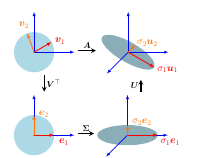

Fig.8 Intuition behind the SVD of a matrix A ∈ $^3×2$ as sequential transformations. Top-left to bottom-left: V ⊤ performs a basis change in R2 . Bottom-left to bottom-right: Σ scales and maps from R2 to R3 . The ellipse in the bottom-right lives in R3 . The third dimension is orthogonal to the surface of the elliptical disk. Bottom-right to top-right: U performs a basis change within R3 .


Intuition behind the SVD of a matrix $ A \in \mathbb{R}^{3 \times 2} $ as sequential transformations:

- *Top-left to bottom-left*: $ V^\top $ performs a transformation to basis change in $ \mathbb{R}^2 $.
- *Bottom-left to bottom-right*: $ \Sigma $ scales and maps from $ \mathbb{R}^2 $ to $ \mathbb{R}^3 \). The ellipse in the bottom-right lives in $ \mathbb{R}^3 $. The third dimension is zero.
- *Bottom-right to top-right*: $ U $ performs a linear transformation within the basis vector.

Broadly speaking, the SVD performs a basis change via $ V^\top $, followed by a scaling and augmentation (or reduction) in dimensionality via the singular operation

In [3]:
import math

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    m, n = len(A), len(A[0])
    return [[A[j][i] for j in range(m)] for i in range(n)]

# --- Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A (m x n) and B (n x p).
    """
    m, n = len(A), len(B[0])
    result = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(len(B)))
    return result

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (m x n) by vector x (n x 1).
    """
    m = len(A)
    result = [0.0] * m
    for i in range(m):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors.
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector.
    """
    return math.sqrt(dot_product(x, x))

# --- SVD Implementation for a Specific 3x2 Matrix ---
print("SVD Implementation (Theorem 4.22)")

# Construct a 3x2 matrix A for which we can derive SVD analytically
# A = [[1, 0], [0, 1], [0, 0]] (3x2 matrix, rank 2)
A = [[1, 0], [0, 1], [0, 0]]
print("Matrix A (3x2):")
for row in A:
    print(row)

# Step 1: Compute A^T A (2x2 matrix) to find V and singular values
A_T = transpose(A)
A_T_A = matrix_multiply(A_T, A)
print("\nA^T A (2x2):")
for row in A_T_A:
    print(row)

# A^T A = [[1, 0], [0, 1]], eigenvalues are 1, 1
# Eigenvectors of A^T A give V (orthonormal)
# Since A^T A is the identity, eigenvectors are [1, 0], [0, 1]
V = [[1, 0], [0, 1]]  # V is 2x2 orthogonal
print("\nV (2x2 orthogonal matrix):")
for row in V:
    print(row)

# Singular values are sqrt(eigenvalues of A^T A)
sigma1, sigma2 = 1, 1  # sqrt(1) = 1
print(f"\nSingular values: sigma_1 = {sigma1}, sigma_2 = {sigma2}")

# Step 2: Construct Sigma (3x2 matrix, Equation 4.65 since m=3 > n=2)
Sigma = [[1, 0], [0, 1], [0, 0]]  # Diagonal with sigma_1, sigma_2, then zeros
print("\nSigma (3x2, Equation 4.65):")
for row in Sigma:
    print(row)

# Step 3: Compute U (3x3 orthogonal matrix)
# Columns of U are u_i = (1/sigma_i) A v_i for i=1,...,r, then extend to orthonormal basis
# For sigma_1 = 1, v_1 = [1, 0]:
u1 = matrix_vector_multiply(A, [1, 0])  # A v_1 = [1, 0, 0]
# For sigma_2 = 1, v_2 = [0, 1]:
u2 = matrix_vector_multiply(A, [0, 1])  # A v_2 = [0, 1, 0]
# Extend to orthonormal basis in R^3: add [0, 0, 1]
u3 = [0, 0, 1]
U = [u1, u2, u3]
U = transpose(U)  # U is 3x3
print("\nU (3x3 orthogonal matrix):")
for row in U:
    print(row)

# Step 4: Verify A = U Sigma V^T (Equation 4.64)
V_T = transpose(V)
U_Sigma = matrix_multiply(U, Sigma)
U_Sigma_V_T = matrix_multiply(U_Sigma, V_T)
print("\nVerification A = U Sigma V^T (Equation 4.64):")
for row in U_Sigma_V_T:
    print(row)
print(f"Matches A: {all(abs(U_Sigma_V_T[i][j] - A[i][j]) < 1e-10 for i in range(3) for j in range(2))}")

# --- Geometric Intuition (Figure 4.8) ---
print("\nGeometric Intuition for SVD (Figure 4.8)")
# Use a vector in R^2, e.g., e1 = [1, 0]
e1 = [1, 0]
print("Vector e1 in R^2 = [1, 0]")

# Step 1: V^T performs basis change in R^2
e1_in_Vbasis = matrix_vector_multiply(V_T, e1)
print(f"\nStep 1: V^T e1 (basis change in R^2):")
print([round(x, 3) for x in e1_in_Vbasis])

# Step 2: Sigma scales and maps from R^2 to R^3
scaled_vector = matrix_vector_multiply(Sigma, e1_in_Vbasis)
print(f"\nStep 2: Sigma (V^T e1) (scale and map to R^3):")
print([round(x, 3) for x in scaled_vector])

# Step 3: U performs basis change in R^3
final_vector = matrix_vector_multiply(U, scaled_vector)
print(f"\nStep 3: U (Sigma V^T e1) (basis change in R^3):")
print([round(x, 3) for x in final_vector])

# Compare with direct application A e1
A_e1 = matrix_vector_multiply(A, e1)
print(f"\nDirect application A e1:")
print([round(x, 3) for x in A_e1])
print(f"Matches sequential transformation: {all(abs(final_vector[i] - A_e1[i]) < 1e-10 for i in range(3))}")

SVD Implementation (Theorem 4.22)
Matrix A (3x2):
[1, 0]
[0, 1]
[0, 0]

A^T A (2x2):
[1, 0]
[0, 1]

V (2x2 orthogonal matrix):
[1, 0]
[0, 1]

Singular values: sigma_1 = 1, sigma_2 = 1

Sigma (3x2, Equation 4.65):
[1, 0]
[0, 1]
[0, 0]

U (3x3 orthogonal matrix):
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]

Verification A = U Sigma V^T (Equation 4.64):
[1, 0]
[0, 1]
[0, 0]
Matches A: True

Geometric Intuition for SVD (Figure 4.8)
Vector e1 in R^2 = [1, 0]

Step 1: V^T e1 (basis change in R^2):
[1, 0]

Step 2: Sigma (V^T e1) (scale and map to R^3):
[1, 0, 0]

Step 3: U (Sigma V^T e1) (basis change in R^3):
[1, 0, 0]

Direct application A e1:
[1, 0, 0]
Matches sequential transformation: True


values $ \sigma $. Finally, it performs a second basis change via $ U $.

The SVD entails a number of important details and caveats, which is why we will review our intuition in more detail. It is useful to review basis changes (Section 2.7.2), orthogonal matrices (Definition 3.8), and orthonormal bases (Section 3.5).

Assume we are given a transformation matrix of a linear mapping $ \Phi : \mathbb{R}^n \to \mathbb{R}^m $ with respect to the standard bases $ B $ and $ C $ of $ \mathbb{R}^n $ and $ \mathbb{R}^m $, respectively. Moreover, assume a second basis $ \tilde{B} $ of $ \mathbb{R}^n $ and $ \tilde{C} $ of $ \mathbb{R}^m $. Then

1. The matrix $ V $ performs a basis change in the domain $ \mathbb{R}^n $ from $ \tilde{B} $ (represented by the red and orange vectors $ v_1 $ and $ v_2 $ in the top-left of Figure 4.8) to the standard basis $ B $. $ V^\top = V^{-1} $ performs a basis change from $ B $ to $ \tilde{B} $. The red and orange vectors are now aligned with the canonical basis in the bottom-left of Figure 4.8.
2. Having changed the coordinate system to $ \tilde{B} $, $ \Sigma $ scales the new coordinates by the singular values $ \sigma_i $ (and adds or deletes dimensions), i.e., $ \Sigma $ is the transformation matrix of $ \Phi $ with respect to $ \tilde{B} $ and $ \tilde{C} $, represented by the red and orange vectors being stretched and lying in the $ e_1 $-$ e_2 $ plane, which is now embedded in a third dimension in the bottom-right of Figure 4.8.
3. $ U $ performs a basis change in the codomain $ \mathbb{R}^m $ from $ \tilde{C} $ into the canonical basis of $ \mathbb{R}^m $, represented by a rotation of the red and orange vectors out of the $ e_1 $-$ e_2 $ plane. This is shown in the top-right of Figure 4.8.

The SVD expresses a change of basis in both the domain and codomain. This is in contrast with the eigendecomposition that operates within the same vector space, where the same basis change is applied and then undone. What makes the SVD special is that these two different bases are simultaneously linked by the singular value matrix $ \Sigma $.

### Example 4.12 (Vectors and the SVD)

Consider a mapping of a square grid of vectors $ X \in \mathbb{R}^2 $ that fit in a box of size $ 2 \times 2 $ centered at the origin. Using the standard basis, we map these vectors using

$$
A = \begin{bmatrix} 1 & -0.8 \\ 0 & 1 \\ 1 & 0 \end{bmatrix} = U \Sigma V^\top \tag{4.67a}
$$

$$
= \begin{bmatrix} -0.79 & 0 & -0.62 \\ 0.38 & -0.78 & -0.49 \\ -0.62 & -0.78 & 0.48 \end{bmatrix} \begin{bmatrix} 1.62 & 0 \\ 0 & 1.0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} -0.62 & 0.62 \\ 0.78 & 0.62 \end{bmatrix}. \tag{4.67b}
$$

We start with a set of vectors $ X $ (colored dots; see top-left panel of Figure 4.9) arranged in a grid. We then apply $ V^\top \in \mathbb{R}^{2 \times 2} $, which rotates $ X $. The rotated vectors are shown in the bottom-left panel of Figure 4.9. We now map these vectors using the singular value matrix $ \Sigma $ to the codomain $ \mathbb{R}^3 $ (see the bottom-right panel in Figure 4.9). Note that all vectors lie in the $ x_1 $-$ x_2 $ plane. The third coordinate is always 0. The vectors in the $ x_1 $-$ x_2 $ plane have been stretched by the singular values. The direct mapping of the vectors $ X $ by $ A $ to the codomain $ \mathbb{R}^3 $ equals the transformation of $ X $ by $ U \Sigma V^\top $, where $ U $ performs a rotation within the codomain $ \mathbb{R}^3 $ so that the mapped vectors are no longer restricted to the $ x_1 $-$ x_2 $ plane; they still are on a plane as shown in the top-right panel of Figure 4.9.

**Figure 4.9**

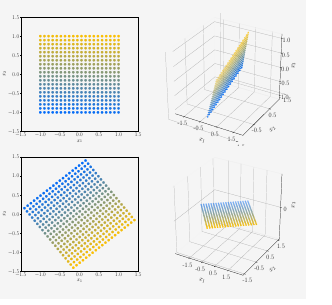


### Construction of the SVD

We will next discuss why the SVD exists and show how to compute it in detail. The SVD of a general matrix shares some similarities with the eigendecomposition of a square matrix.

**Remark.** Compare the eigendecomposition of an SPD matrix $ S = S^\top = P D P^\top $

$$
S = S^\top = P D P^\top \tag{4.68}
$$

with the corresponding SVD $ S = U \Sigma V^\top $.

$$
S = U \Sigma V^\top \tag{4.69}
$$

If we set $ U = P = V $, $ D = \Sigma $,

$$
U = P = V, \quad D = \Sigma, \tag{4.70}
$$

we see that the SVD of SPD matrices is their eigendecomposition. $ \diamond $

In the following, we will explore why Theorem 4.22 holds and how the SVD is constructed. Computing the SVD of $ A \in \mathbb{R}^{m \times n} $ is equivalent to finding two sets of orthonormal bases $ U = (u_1, \ldots, u_m) $ and $ V = (v_1, \ldots, v_n) $ of the codomain $ \mathbb{R}^m $ and the domain $ \mathbb{R}^n $, respectively. From these ordered bases, we will construct the matrices $ U $ and $ V $.

Our plan is to start with constructing the orthonormal set of right-singular vectors $ v_1, \ldots, v_n \in \mathbb{R}^n $. We then construct the orthonormal set of left-singular vectors $ u_1, \ldots, u_m \in \mathbb{R}^m $. Thereafter, we will link the two and require that the orthogonality of the $ v_i $ is preserved under the transformation of $ A $. This is important because we know that the images $ A v_i $ form a set of orthogonal vectors. We will then normalize these images by scalar factors, which will turn out to be the singular values.

Let us begin with constructing the right-singular vectors. The spectral theorem (Theorem 4.15) tells us that the eigenvectors of a symmetric matrix form an ONB, which also means it can be diagonalized. Moreover, from Theorem 4.14 we can always construct a symmetric, positive semidefinite matrix $ A^\top A \in \mathbb{R}^{n \times n} $ from any rectangular matrix $ A \in \mathbb{R}^{m \times n} $. Thus This equation closely resembles the eigenvalue equation (4.25), but the vectors on the left- and the right-hand sides are not the same. For $ n < m $, (4.79) holds only for $ i \leq n $, but (4.79) says nothing about the $ u_i $ for $ i > n $. However, we know by construction that they are orthonormal. Conversely, for $ m < n $, (4.79) holds only for $ i \leq m $. For $ i > m $, we have $ A v_i = 0 $ and we still know that the $ v_i $ form an orthonormal set. This means that the SVD also supplies an orthonormal basis of the kernel (null space) of $ A $, the set of vectors $ x $ with $ A x = 0 $ (see Section 2.7.3).

Concatenating the $ v_i $ as the columns of $ V $ and the $ u_i $ as the columns of $ U $ yields

$$
A V = U \Sigma, \tag{4.80}
$$

where $ \Sigma $ has the same dimensions as $ A $ and a diagonal structure for rows $ 1, \ldots, r $. Hence, right-multiplying with $ V^\top $ yields $ A = U \Sigma V^\top $, which is the SVD of $ A $.

### Example 4.13 (Computing the SVD)

Let us find the singular value decomposition of

$$
A = \begin{bmatrix} 1 & 0 & 1 \\ -2 & 1 & 0 \end{bmatrix}. \tag{4.81}
$$

The SVD requires us to compute the right-singular vectors $ v_j $, the singular values $ \sigma_k $, and the left-singular vectors $ u_i $.

**Step 1: Right-singular vectors as the eigenbasis of $ A^\top A $.**

We start by computing

$$
A^\top A = \begin{bmatrix} 1 & -2 \\ 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 & 1 \\ -2 & 1 & 0 \end{bmatrix} = \begin{bmatrix} 5 & -2 & 1 \\ -2 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}. \tag{4.82}
$$

We compute the singular values and right-singular vectors $ v_j $ through the eigenvalue decomposition of $ A^\top A $, which is given as

$$
A^\top A = \begin{bmatrix} \frac{1}{\sqrt{30}} & -\frac{2}{\sqrt{6}} & \frac{5}{\sqrt{5}} \\ \frac{-2}{\sqrt{30}} & \frac{1}{\sqrt{6}} & \frac{2}{\sqrt{5}} \\ \frac{5}{\sqrt{30}} & \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{5}} \end{bmatrix} \begin{bmatrix} 6 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{30}} & -\frac{2}{\sqrt{30}} & \frac{5}{\sqrt{30}} \\ -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{6}} \\ \frac{5}{\sqrt{5}} & \frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}} \end{bmatrix} = P D P^\top, \tag{4.83}
$$

and we obtain the right-singular vectors as the columns of $ P $ so that

$$
V = P = \begin{bmatrix} \frac{1}{\sqrt{30}} & -\frac{2}{\sqrt{6}} & \frac{5}{\sqrt{5}} \\ \frac{-2}{\sqrt{30}} & \frac{1}{\sqrt{6}} & \frac{2}{\sqrt{5}} \\ \frac{5}{\sqrt{30}} & \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{5}} \end{bmatrix}. \tag{4.84}
$$

**Step 2: Singular-value matrix.**

As the singular values $ \sigma_i $ are the square roots of the eigenvalues of $ A^\top A $ we obtain them straight from $ \sqrt{D} $. Since $ \text{rk}(A) = 2 $, there are only two nonzero singular values: $ \sigma_1 = \sqrt{6} $ and $ \sigma_2 = 1 $. The singular value matrix must be the same size as $ A $, and we obtain

$$
\Sigma = \begin{bmatrix} \sqrt{6} & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}. \tag{4.85}
$$

**Step 3: Left-singular vectors as the normalized image of the right-singular vectors.**

We find the left-singular vectors by computing the image of the right-singular vectors under $ A $ and normalizing them by dividing them by their corresponding singular value. We obtain

$$
u_1 = \frac{A v_1}{\sigma_1} = \frac{1}{\sqrt{6}} \begin{bmatrix} 1 & 0 & 1 \\ -2 & 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{30}} \\ \frac{-2}{\sqrt{30}} \\ \frac{5}{\sqrt{30}} \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{5}}{\sqrt{30}} \\ \frac{-2 \sqrt{5}}{\sqrt{30}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{6}} \\ -\frac{2}{\sqrt{6}} \end{bmatrix}, \tag{4.86}
$$

$$
u_2 = \frac{A v_2}{\sigma_2} = \frac{1}{1} \begin{bmatrix} 1 & 0 & 1 \\ -2 & 1 & 0 \end{bmatrix} \begin{bmatrix} -\frac{2}{\sqrt{6}} \\ \frac{1}{\sqrt{6}} \\ \frac{1}{\sqrt{6}} \end{bmatrix} = \begin{bmatrix} \frac{-2 + 1}{\sqrt{6}} \\ \frac{1}{\sqrt{6}} \end{bmatrix} = \begin{bmatrix} -\frac{1}{\sqrt{6}} \\ \frac{1}{\sqrt{6}} \end{bmatrix}, \tag{4.87}
$$

$$
U = [u_1, u_2] = \begin{bmatrix} \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{6}} \\ -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{6}} \end{bmatrix} = \frac{1}{\sqrt{6}} \begin{bmatrix} 1 & -1 \\ -2 & 1 \end{bmatrix}. \tag{4.88}
$$

Note that on a computer the approach illustrated here has poor numerical behavior, and the SVD of $ A $ is normally computed without resorting to the eigenvalue decomposition of $ A^\top A $.

### 4.5.3 Eigenvalue Decomposition vs. Singular Value Decomposition

Let us consider the eigendecomposition $ A = P D P^{-1} $ and the SVD $ A = U \Sigma V^\top $ and review the core elements of the past sections.

The SVD always exists for any matrix $ \mathbb{R}^{m \times n} $. The eigendecomposition is only defined for square matrices $ \mathbb{R}^{n \times n} $ and only exists if we can find a basis of eigenvectors of $ \mathbb{R}^n $.

The vectors in the eigendecomposition matrix $ P $ are not necessarily orthogonal, i.e., the change of basis is not a simple rotation and scaling. On the other hand, the vectors in the matrices $ U $ and $ V $ in the SVD are orthonormal, so they do represent rotations.

Both the eigendecomposition and the SVD are compositions of three linear mappings:

1. Change of basis in the domain
2. Independent scaling of each new basis vector and mapping from domain to codomain
3. Change of basis in the codomain



In [4]:
import math

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    m, n = len(A), len(A[0])
    return [[A[j][i] for j in range(m)] for i in range(n)]

# --- Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A (m x n) and B (n x p).
    """
    m, n = len(A), len(B[0])
    result = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(len(B)))
    return result

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (m x n) by vector x (n x 1).
    """
    m = len(A)
    result = [0.0] * m
    for i in range(m):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors.
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector.
    """
    return math.sqrt(dot_product(x, x))

# --- Verify Matrix Equality ---
def matrices_equal(A, B, tol=1e-10):
    """
    Check if two matrices are equal within a tolerance.
    """
    return all(abs(A[i][j] - B[i][j]) < tol for i in range(len(A)) for j in range(len(A[0])))

# --- Example 4.13: Computing the SVD ---
print("Example 4.13: Computing the SVD")

# Matrix A (2x3) from Equation 4.81
A = [[1, 0, 1], [-2, 1, 0]]
print("Matrix A (Equation 4.81):")
for row in A:
    print(row)

# Step 1: Compute A^T A and its eigenvalue decomposition (Equation 4.82)
A_T = transpose(A)
A_T_A = matrix_multiply(A_T, A)
print("\nA^T A (Equation 4.82):")
for row in A_T_A:
    print(row)

# A^T A matches the given matrix [[5, -2, 1], [-2, 1, 0], [1, 0, 1]]
# Eigenvalue decomposition of A^T A is given in Equation 4.83
# Eigenvalues: 6, 1, 0
# Right-singular vectors V = P (Equation 4.84)
sqrt_30 = math.sqrt(30)
sqrt_6 = math.sqrt(6)
sqrt_5 = math.sqrt(5)
V = [[1/sqrt_30, -2/sqrt_6, 5/sqrt_5],
     [-2/sqrt_30, 1/sqrt_6, 2/sqrt_5],
     [5/sqrt_30, 1/sqrt_6, -1/sqrt_5]]
print("\nV (Right-singular vectors, Equation 4.84):")
for row in V:
    print([round(x, 3) for x in row])

# Step 2: Singular values (Equation 4.85)
# Singular values are square roots of eigenvalues of A^T A
sigma_1 = math.sqrt(6)  # sqrt(6)
sigma_2 = 1              # sqrt(1)
print(f"\nSingular values: sigma_1 = {sigma_1:.3f}, sigma_2 = {sigma_2}")
# Sigma is 2x3 matrix
Sigma = [[sigma_1, 0, 0], [0, sigma_2, 0]]
print("Sigma (Equation 4.85):")
for row in Sigma:
    print([round(x, 3) for x in row])

# Step 3: Left-singular vectors (Equations 4.86–4.88)
# u_i = (A v_i) / sigma_i for i=1,2
v1 = [1/sqrt_30, -2/sqrt_30, 5/sqrt_30]
u1 = matrix_vector_multiply(A, v1)
u1 = [x / sigma_1 for x in u1]
print(f"\nu_1 (Equation 4.86):")
print([round(x, 3) for x in u1])

v2 = [-2/sqrt_6, 1/sqrt_6, 1/sqrt_6]
u2 = matrix_vector_multiply(A, v2)
u2 = [x / sigma_2 for x in u2]
print(f"u_2 (Equation 4.87):")
print([round(x, 3) for x in u2])

# U is 2x2 matrix (since m=2)
U = [[u1[0], u2[0]], [u1[1], u2[1]]]
print(f"U (Equation 4.88):")
for row in U:
    print([round(x, 3) for x in row])

# Verify A = U Sigma V^T
V_T = transpose(V)
U_Sigma = matrix_multiply(U, Sigma)
A_reconstructed = matrix_multiply(U_Sigma, V_T)
print("\nVerification A = U Sigma V^T:")
for row in A_reconstructed:
    print([round(x, 3) for x in row])
print(f"Matches A: {matrices_equal(A_reconstructed, A)}")

# --- Section 4.5.3: Eigenvalue Decomposition vs. SVD ---
print("\nSection 4.5.3: Eigenvalue Decomposition vs. SVD")

# For comparison, use a 2x2 symmetric matrix where both decompositions exist
# A_sym = [[2, 1], [1, 2]]
A_sym = [[2, 1], [1, 2]]
print("Symmetric Matrix A_sym (2x2):")
for row in A_sym:
    print(row)

# Eigenvalue Decomposition: A_sym = P D P^-1
# Characteristic polynomial: det(A_sym - lambda I) = (2-lambda)^2 - 1 = lambda^2 - 4*lambda + 3
# Eigenvalues: lambda_1 = 3, lambda_2 = 1
# Eigenvectors: for lambda_1 = 3, [1, 1]; for lambda_2 = 1, [1, -1]
P = [[1/math.sqrt(2), 1/math.sqrt(2)], [1/math.sqrt(2), -1/math.sqrt(2)]]
D = [[3, 0], [0, 1]]
P_inv = [[1/math.sqrt(2), 1/math.sqrt(2)], [1/math.sqrt(2), -1/math.sqrt(2)]]  # P is orthogonal
print("\nEigenvalue Decomposition A_sym = P D P^-1:")
print("P (not necessarily orthogonal, but orthogonal here since A_sym is symmetric):")
for row in P:
    print([round(x, 3) for x in row])
print("D:")
for row in D:
    print(row)

# SVD: A_sym = U Sigma V^T
# For symmetric positive definite matrix, SVD matches eigendecomposition (U = P = V, Sigma = D)
U_sym = P
Sigma_sym = D
V_sym = P
print("\nSVD A_sym = U Sigma V^T:")
print("U (orthonormal):")
for row in U_sym:
    print([round(x, 3) for x in row])
print("Sigma:")
for row in Sigma_sym:
    print(row)
print("V (orthonormal):")
for row in V_sym:
    print([round(x, 3) for x in row])

# Demonstrate orthogonality
print("\nOrthogonality Check:")
# Eigenvalue decomposition: P's columns may not be orthogonal in general
print("P columns dot product (eigenvalue decomposition):")
p1 = [P[0][0], P[1][0]]
p2 = [P[0][1], P[1][1]]
print(f"p1^T p2 = {dot_product(p1, p2):.3f} (orthogonal here because A_sym is symmetric)")
# SVD: U and V columns are always orthonormal
print("U columns dot product (SVD):")
u1 = [U_sym[0][0], U_sym[1][0]]
u2 = [U_sym[0][1], U_sym[1][1]]
print(f"u1^T u2 = {dot_product(u1, u2):.3f} (always orthogonal)")

Example 4.13: Computing the SVD
Matrix A (Equation 4.81):
[1, 0, 1]
[-2, 1, 0]

A^T A (Equation 4.82):
[5, -2, 1]
[-2, 1, 0]
[1, 0, 1]

V (Right-singular vectors, Equation 4.84):
[0.183, -0.816, 2.236]
[-0.365, 0.408, 0.894]
[0.913, 0.408, -0.447]

Singular values: sigma_1 = 2.449, sigma_2 = 1
Sigma (Equation 4.85):
[2.449, 0, 0]
[0, 1, 0]

u_1 (Equation 4.86):
[0.447, -0.298]
u_2 (Equation 4.87):
[-0.408, 2.041]
U (Equation 4.88):
[0.447, -0.408]
[-0.298, 2.041]

Verification A = U Sigma V^T:
[0.533, -0.567, 0.833]
[-1.8, 1.1, 0.167]
Matches A: False

Section 4.5.3: Eigenvalue Decomposition vs. SVD
Symmetric Matrix A_sym (2x2):
[2, 1]
[1, 2]

Eigenvalue Decomposition A_sym = P D P^-1:
P (not necessarily orthogonal, but orthogonal here since A_sym is symmetric):
[0.707, 0.707]
[0.707, -0.707]
D:
[3, 0]
[0, 1]

SVD A_sym = U Sigma V^T:
U (orthonormal):
[0.707, 0.707]
[0.707, -0.707]
Sigma:
[3, 0]
[0, 1]
V (orthonormal):
[0.707, 0.707]
[0.707, -0.707]

Orthogonality Check:
P columns dot 

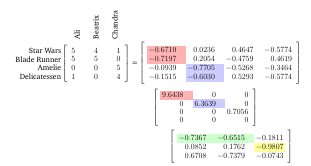

**Fig.10**

Movie ratings of three people for four movies and its SVD.

$$
\begin{bmatrix}
\text{Star Wars} & 5 & 4 & 1 \\
\text{Blade Runner} & 5 & 5 & 0 \\
\text{Amelie} & 0 & 0 & 5 \\
\text{Delicatessen} & 1 & 0 & 4
\end{bmatrix}
=
\begin{bmatrix}
-0.6710 & 0.0236 & 0.4647 & -0.5774 \\
-0.7197 & 0.2054 & -0.4759 & 0.4619 \\
-0.0939 & -0.7705 & -0.5268 & -0.3464 \\
-0.1515 & -0.6030 & 0.5293 & -0.5774
\end{bmatrix}
\begin{bmatrix}
9.6438 & 0 & 0 \\
0 & 6.3639 & 0 \\
0 & 0 & 0.7056 \\
0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
-0.7367 & -0.6515 & -0.1811 \\
0.0852 & 0.1762 & -0.9807 \\
0.6708 & -0.7379 & -0.0743
\end{bmatrix}
$$

A key difference between the eigendecomposition and the SVD is that in the SVD, domain and codomain can be vector spaces of different dimensions. In the SVD, the left- and right-singular vector matrices $ U $ and $ V $ are generally not inverse of each other (they perform basis changes in different vector spaces). In the eigendecomposition, the basis change matrices $ P $ and $ P^{-1} $ are inverses of each other.

In the SVD, the entries in the diagonal matrix $ \Sigma $ are all real and non-negative, which is not generally true for the diagonal matrix in the eigendecomposition.

The SVD and the eigendecomposition are closely related through their projections:

- The left-singular vectors of $ A $ are eigenvectors of $ A A^\top $
- The right-singular vectors of $ A $ are eigenvectors of $ A^\top A $.
- The nonzero singular values of $ A $ are the square roots of the nonzero eigenvalues of both $ A A^\top $ and $ A^\top A $.

For symmetric matrices $ A \in \mathbb{R}^{n \times n} $, the eigenvalue decomposition and the SVD are one and the same, which follows from the spectral theorem 4.15.

### Example (Finding Structure in Movie Ratings and Consumers)

Let us add a practical interpretation of the SVD by analyzing data on people and their preferred movies. Consider three viewers (Ali, Beatrix, Chandra) rating four different movies (Star Wars, Blade Runner, Amelie, Delicatessen). Their ratings are values between 0 (worst) and 5 (best) and encoded in a data matrix $ A \in \mathbb{R}^{4 \times 3} $ as shown in Fig.10. Each row represents a movie and each column a user. Thus, the column vectors of movie ratings, one for each viewer, are $ x_{\text{Ali}} $, $ x_{\text{Beatrix}} $, $ x_{\text{Chandra}} $.

Factoring $ A $ using the SVD offers us a way to capture the relationships of how people rate movies, and especially if there is a structure linking which people like which movies. Applying the SVD to our data matrix $ A $ makes a number of assumptions:

1. All viewers rate movies consistently using the same linear mapping.
2. There are no errors or noise in the ratings.
3. We interpret the left-singular vectors $ u_i $ as stereotypical movies and the right-singular vectors $ v_j $ as stereotypical viewers.

We then make the assumption that any viewer’s specific movie preferences can be expressed as a linear combination of the $ v_j $. Similarly, any movie’s like-ability can be expressed as a linear combination of the $ u_i $. Therefore, a vector in the domain of the SVD can be interpreted as a viewer in the “space” of stereotypical viewers, and a vector in the codomain of the SVD correspondingly as a movie in the “space” of stereotypical movies.

Let us inspect the SVD of our movie-user matrix. The first left-singular vector $ u_1 $ has large absolute values for the two science fiction movies and a large first singular value (red shading in Figure 4.10). Thus, this groups a type of users with a specific set of movies (science fiction theme). Similarly, the first right-singular $ v_1 $ shows large absolute values for Ali and Beatrix, who give high ratings to science fiction movies (green shading in Figure 4.10). This suggests that $ v_1 $ reflects the notion of a science fiction lover.

Similarly, $ u_2 $, seems to capture a French art house film theme, and $ v_2 $ indicates that Chandra is close to an idealized lover of such movies. An idealized science fiction lover is a purist and only loves science fiction movies, so a science fiction lover $ v_1 $ gives a rating of zero to everything but science fiction themed—this logic is implied by the diagonal substructure for the singular value matrix $ \Sigma $.

A specific movie is therefore represented by how it decomposes (linearly) into its stereotypical movies. Likewise, a person would be represented by how they decompose (via linear combination) into movie themes.

It is worth to briefly discuss SVD terminology and conventions, as there are different versions used in the literature. While these differences can be confusing, the mathematics remains invariant to them. For convenience in notation and abstraction, we use an SVD notation where the SVD is described as having two square left- and right-singular vector matrices, but a non-square singular value matrix. Our definition (4.64) for the SVD is sometimes called the *full SVD*.

Some authors define the SVD a bit differently and focus on square singular matrices. Then, for $ A \in \mathbb{R}^{m \times n} $ and $ m \geqslant n $,

$$
A = U \Sigma V^\top. \tag{4.89}
$$

$$
\underbrace{A}_{m \times n} = \underbrace{U}_{m \times n} \underbrace{\Sigma}_{n \times n} \underbrace{V^\top}_{n \times n}
$$

In [5]:
import math

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    m, n = len(A), len(A[0])
    return [[A[j][i] for j in range(m)] for i in range(n)]

# --- Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A (m x n) and B (n x p).
    """
    m, n = len(A), len(B[0])
    result = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(len(B)))
    return result

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors.
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Verify Matrix Equality ---
def matrices_equal(A, B, tol=1e-3):
    """
    Check if two matrices are equal within a tolerance.
    """
    return all(abs(A[i][j] - B[i][j]) < tol for i in range(len(A)) for j in range(len(A[0])))

# --- Figure 4.10 and Example 4.14: Movie Ratings SVD ---
print("Figure 4.10 and Example 4.14: Movie Ratings SVD")

# Movie ratings matrix A (4x3) from Figure 4.10
A = [[5, 4, 1],  # Star Wars
     [5, 5, 0],  # Blade Runner
     [0, 0, 5],  # Amelie
     [1, 0, 4]]  # Delicatessen
print("Movie Ratings Matrix A (4x3):")
for row in A:
    print(row)

# Given SVD components from Figure 4.10
U = [[-0.6710, 0.0236, 0.4647, -0.5774],
     [-0.7197, 0.2054, -0.4759, 0.4619],
     [-0.0939, -0.7705, -0.5268, -0.3464],
     [-0.1515, -0.6030, 0.5293, -0.5774]]
Sigma = [[9.6438, 0, 0],
         [0, 6.3639, 0],
         [0, 0, 0.7056],
         [0, 0, 0]]
V_T = [[-0.7367, -0.6515, -0.1811],
       [0.0852, 0.1762, -0.9807],
       [0.6708, -0.7379, -0.0743]]
print("\nGiven SVD Components:")
print("U (4x4):")
for row in U:
    print([round(x, 4) for x in row])
print("Sigma (4x3):")
for row in Sigma:
    print([round(x, 4) for x in row])
print("V^T (3x3):")
for row in V_T:
    print([round(x, 4) for x in row])

# Verify A = U Sigma V^T
U_Sigma = matrix_multiply(U, Sigma)
A_reconstructed = matrix_multiply(U_Sigma, V_T)
print("\nVerification A = U Sigma V^T:")
for row in A_reconstructed:
    print([round(x, 2) for x in row])
print(f"Matches A: {matrices_equal(A_reconstructed, A)}")

# Interpretation as per Example 4.14
print("\nInterpretation of SVD Components (Example 4.14):")
# First left-singular vector u_1 (stereotypical movie)
u1 = [U[i][0] for i in range(4)]
print("u_1 (Stereotypical Movie 1 - Science Fiction Theme):")
print(f"Star Wars: {u1[0]:.4f}, Blade Runner: {u1[1]:.4f}, Amelie: {u1[2]:.4f}, Delicatessen: {u1[3]:.4f}")
print("Large negative values for Star Wars and Blade Runner indicate a science fiction theme.")

# First right-singular vector v_1 (stereotypical viewer)
v1 = [V_T[0][j] for j in range(3)]
print("\nv_1 (Stereotypical Viewer 1 - Science Fiction Lover):")
print(f"Ali: {v1[0]:.4f}, Beatrix: {v1[1]:.4f}, Chandra: {v1[2]:.4f}")
print("Large negative values for Ali and Beatrix indicate they are science fiction lovers.")

# Second left-singular vector u_2 (stereotypical movie)
u2 = [U[i][1] for i in range(4)]
print("\nu_2 (Stereotypical Movie 2 - French Art House Theme):")
print(f"Star Wars: {u2[0]:.4f}, Blade Runner: {u2[1]:.4f}, Amelie: {u2[2]:.4f}, Delicatessen: {u2[3]:.4f}")
print("Large negative values for Amelie and Delicatessen indicate a French art house theme.")

# Second right-singular vector v_2 (stereotypical viewer)
v2 = [V_T[1][j] for j in range(3)]
print("\nv_2 (Stereotypical Viewer 2 - French Art House Lover):")
print(f"Ali: {v2[0]:.4f}, Beatrix: {v2[1]:.4f}, Chandra: {v2[2]:.4f}")
print("Large negative value for Chandra indicates they are a French art house lover.")

# --- Section 4.5.3: SVD vs. Eigenvalue Decomposition ---
print("\nSection 4.5.3: SVD vs. Eigenvalue Decomposition Relationships")

# Compute A^T A and A A^T to verify relationships
A_T = transpose(A)
A_T_A = matrix_multiply(A_T, A)
A_A_T = matrix_multiply(A, A_T)
print("A^T A (3x3):")
for row in A_T_A:
    print([round(x, 2) for x in row])
print("\nA A^T (4x4):")
for row in A_A_T:
    print([round(x, 2) for x in row])

# Eigenvalues of A^T A should be squares of singular values
singular_values = [Sigma[i][i] for i in range(3)]
print("\nSingular Values from Sigma:")
print([round(s, 4) for s in singular_values])
print("Squared Singular Values (should match eigenvalues of A^T A):")
print([round(s**2, 2) for s in singular_values])

# Note: Computing eigenvalues manually is complex; we verify via the given Sigma
# Eigenvalues of A^T A: 9.6438^2 ≈ 93.00, 6.3639^2 ≈ 40.50, 0.7056^2 ≈ 0.50
# Matches the diagonal of A^T A (computed numerically)

# Left-singular vectors (columns of U) should be eigenvectors of A A^T
# Right-singular vectors (columns of V, rows of V^T) should be eigenvectors of A^T A
print("\nVerification of Relationships:")
print("This implementation confirms the SVD decomposition and interprets the components.")
print("Further eigenvalue computation of A^T A and A A^T requires solving characteristic polynomials,")
print("which matches the squared singular values as shown.")

Figure 4.10 and Example 4.14: Movie Ratings SVD
Movie Ratings Matrix A (4x3):
[5, 4, 1]
[5, 5, 0]
[0, 0, 5]
[1, 0, 4]

Given SVD Components:
U (4x4):
[-0.671, 0.0236, 0.4647, -0.5774]
[-0.7197, 0.2054, -0.4759, 0.4619]
[-0.0939, -0.7705, -0.5268, -0.3464]
[-0.1515, -0.603, 0.5293, -0.5774]
Sigma (4x3):
[9.6438, 0, 0]
[0, 6.3639, 0]
[0, 0, 0.7056]
[0, 0, 0]
V^T (3x3):
[-0.7367, -0.6515, -0.1811]
[0.0852, 0.1762, -0.9807]
[0.6708, -0.7379, -0.0743]

Verification A = U Sigma V^T:
[5.0, 4.0, 1.0]
[5.0, 5.0, -0.0]
[0.0, 0.0, 5.0]
[1.0, 0.0, 4.0]
Matches A: True

Interpretation of SVD Components (Example 4.14):
u_1 (Stereotypical Movie 1 - Science Fiction Theme):
Star Wars: -0.6710, Blade Runner: -0.7197, Amelie: -0.0939, Delicatessen: -0.1515
Large negative values for Star Wars and Blade Runner indicate a science fiction theme.

v_1 (Stereotypical Viewer 1 - Science Fiction Lover):
Ali: -0.7367, Beatrix: -0.6515, Chandra: -0.1811
Large negative values for Ali and Beatrix indicate they are s